In [2]:
import random

# Test the genetic algorithm with the provided data
x = [-1, 0, 2, 3]
y = [-2, 0, 1, -1]

# Define the fitness function
def fitness_function(x, y):
  result = 0
  for i in range(len(x)):
    result += (y[i] - (x[i] ** 2)) ** 2
  return result

# Define the initial population
def initial_population(population_size, x):
  population = []
  for i in range(population_size):
    chromosome = []
    for j in range(len(x)):
      chromosome.append(random.uniform(-10, 10))
    population.append(chromosome)
  return population

# Define the selection function
def selection(population, fitness_values):
  max_fitness = max(fitness_values)
  new_population = []
  for i in range(len(population)):
    if random.random() < (fitness_values[i] / max_fitness):
      new_population.append(population[i])
  return new_population

# Define the crossover function
def crossover(population):
  offspring = []
  for i in range(len(population)):
    parent1 = random.choice(population)
    parent2 = random.choice(population)
    child = []
    for j in range(len(parent1)):
      if random.random() < 0.5:
        child.append(parent1[j])
      else:
        child.append(parent2[j])
    offspring.append(child)
  return offspring

# Define the mutation function
def mutation(population):
  for i in range(len(population)):
    for j in range(len(population[i])):
      if random.random() < 0.1:
        population[i][j] += random.uniform(-0.5, 0.5)
  return population

# Define the main function
def genetic_algorithm(population_size, x, generations):
  population = initial_population(population_size, x)
  for i in range(generations):
    fitness_values = []
    for j in range(len(population)):
      fitness_values.append(fitness_function(x, population[j]))
    population = selection(population, fitness_values)
    population = crossover(population)
    population = mutation(population)
  best_fitness = float('inf')
  best_chromosome = []
  for i in range(len(population)):
    current_fitness = fitness_function(x, population[i])
    if current_fitness < best_fitness:
      best_fitness = current_fitness
      best_chromosome = population[i]
  return best_chromosome


best_chromosome = genetic_algorithm(100, x, 1000)
print("Best Chromosome: ", best_chromosome)
print("Best Fitness: ", fitness_function(x, best_chromosome))




Best Chromosome:  [-10.82199331577184, -9.814439558669378, -0.11171500056503214, -13.049663804501463]
Best Fitness:  739.1766239463419


# 2 

The best route chosen: [1, 5, 4, 3, 2, 6, 1]
Length of the best selected route: 128
Lengths of all routes considered: [148, 162, 161, 142, 128]


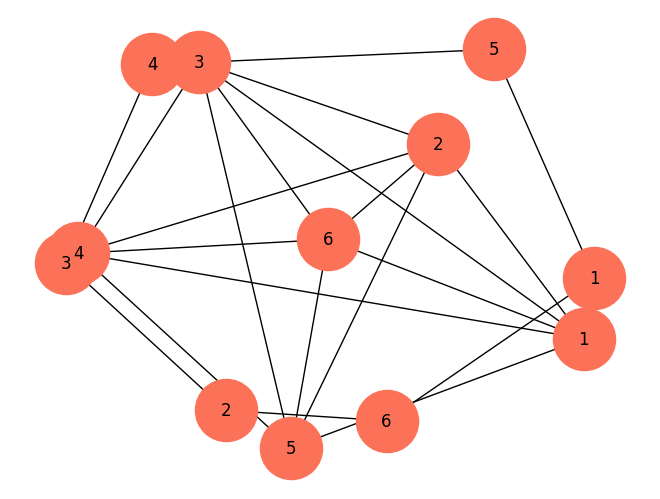

In [ ]:
import networkx as nx
from math import e

distances = [(1, 2, 23),
            (1, 3, 42),
            (1, 4, 40),
            (1, 5, 25),
            (1, 6, 22),
            (2, 3, 20),
            (2, 4, 30),
            (2, 5, 34),
            (2, 6, 13),
            (3, 4, 22),
            (3, 5, 41),
            (3, 6, 21),
            (4, 5, 26),
            (4, 6, 19),
            (5, 6, 22)]

V = [1, 3, 4, 5, 6, 2, 1]
Z = [(4, 5),
    (2, 4),
    (5, 6),
    (6, 2)]
P = [78, 24, 63, 17]

T = 100

def probability(delta, T):
    return 100 * e ** (-delta / T)

def reduceTemp(prevT):
    nextT = 0.5 * prevT
    return nextT

graph = nx.Graph()
graph.add_weighted_edges_from(distances)

nx.draw_kamada_kawai(graph, node_color='#fb7258', node_size=2000, with_labels=True)


def edgeLength(i, j, distances, roundTrip=True):
    if roundTrip:
        return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1)
                    for item in distances])
    else:
        return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])

def routeLength(V, distances):
    edges = [edgeLength(V[i], V[i + 1], distances) for i in range(len(V) - 1)]
    return sum(edges)

def routeOneReplacement(arrV, Z, replacementByName=True):
    decrement = 1 if replacementByName else 0
    arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]
    return arrV

def routeReplacement(V, Z):
    for z in Z:
        V = routeOneReplacement(V, z)
    return V

def chooseRoute(distances, V, Z, T, P):
    sumLength = routeLength(V, distances)
    arrSum = [sumLength]

    for i in range(len(Z)):
        newV = routeReplacement(V, [Z[i]])
        newS = routeLength(newV, distances)
        arrSum.append(newS)
        deltaS = newS - sumLength

        if deltaS > 0:
            p = probability(deltaS, T)
            if p > P[i]:
                V = newV
                sumLength = newS
            else:
                V = V
                sumLength = sumLength
        else:
            V = newV
            sumLength = newS
        T = reduceTemp(T)

    return V, arrSum

def drawRouteGraph(distances, bestRoute):
    newDistances = []
    for i in range(len(bestRoute) - 1):
        for distance in distances:
            if (distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1]) or (distance[1] == bestRoute[i] and distance[0] == bestRoute[i + 1]):
                newDistances.append(distance)

    graph = nx.Graph()
    graph.add_weighted_edges_from(newDistances)
    nx.draw_kamada_kawai(graph, node_color='#fb7258', node_size=2000, with_labels=True)

bestRoute, arrlength = chooseRoute(distances, V, Z, T, P)
print(f'The best route chosen: {bestRoute}')
print(f'Length of the best selected route: {routeLength(bestRoute, distances)}')
print(f'Lengths of all routes considered: {arrlength}')

drawRouteGraph(distances, bestRoute)
